In [1]:
# === CONFIG + MODULE IMPORTS ===
from dotenv import load_dotenv
load_dotenv()

import sys
sys.path.append("../modules")

from jira_api import get_last_n_months_issues
from metrics_calculations import parse_issues_to_dataframe
from visualizations import plot_throughput_bar, plot_combined_ktlo_chart
from utils import report_outliers

import pandas as pd
import matplotlib.pyplot as plt

PROJECT_KEY = "ITSEC"
MONTHS_LOOKBACK = 6


In [2]:
# === FETCH & PREPARE DATA ===
issues = get_last_n_months_issues(PROJECT_KEY, months=MONTHS_LOOKBACK)
df = parse_issues_to_dataframe(issues)
df["Month"] = df["resolved"].dt.to_period("M")

print(f"Issues retrieved: {len(df)}")


Issues retrieved: 44


In [3]:
# === CATEGORIZE KTLO VS NON-KTLO ===
from utils import classify_by_issueflag

df["Category"] = df["customfield_10239"].apply(classify_by_issueflag)


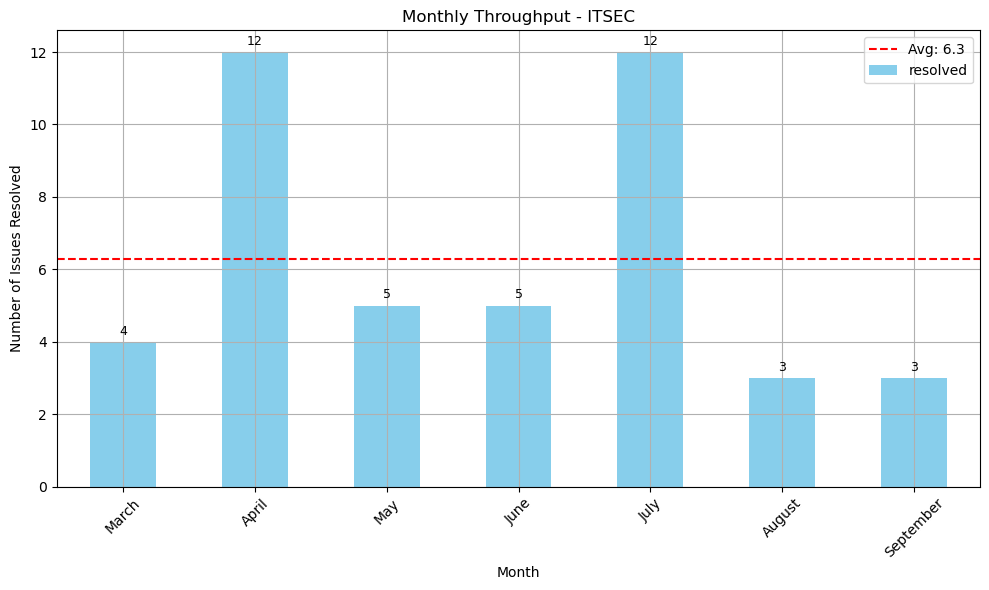

In [4]:
# === MONTHLY THROUGHPUT CHART ===
plot_throughput_bar(df, PROJECT_KEY)


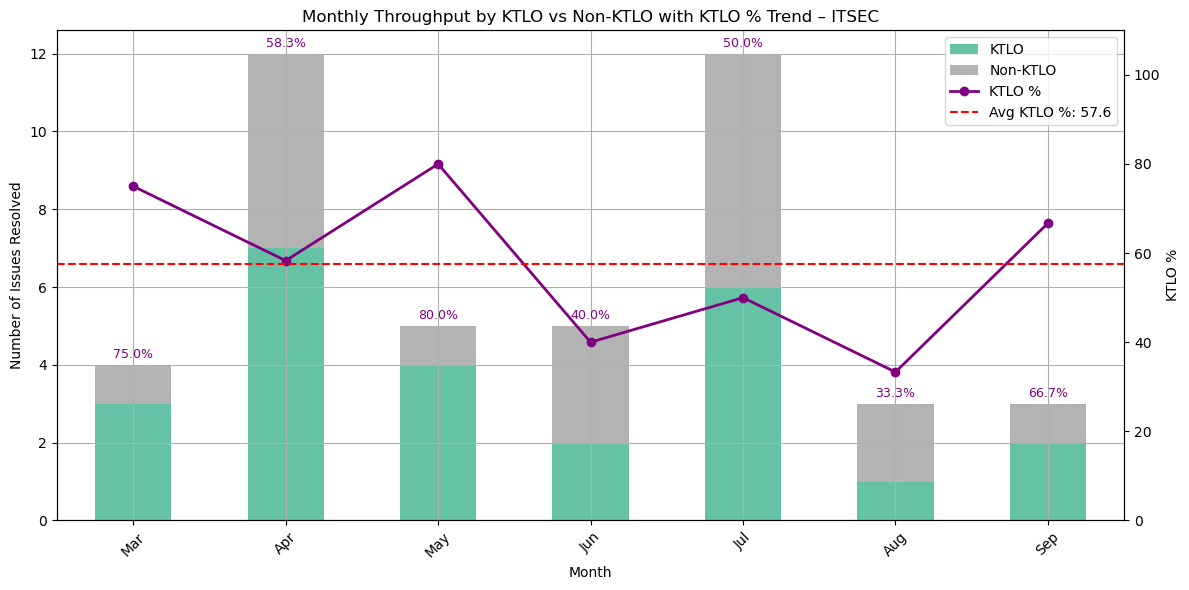

In [5]:
# === COMBINED KTLO CHART WITH % LINE ===
plot_combined_ktlo_chart(df, PROJECT_KEY, show_outliers=True)


In [6]:
# === KTLO SUMMARY TABLE ===
from metrics_calculations import generate_ktlo_summary

ktlo_summary = generate_ktlo_summary(df)
print("KTLO Summary Table:")
print(ktlo_summary)

KTLO Summary Table:
Category    Month  Total  KTLO  Non-KTLO  KTLO %
0         2025-03      4     3         1    75.0
1         2025-04     12     7         5    58.3
2         2025-05      5     4         1    80.0
3         2025-06      5     2         3    40.0
4         2025-07     12     6         6    50.0
5         2025-08      3     1         2    33.3
6         2025-09      3     2         1    66.7


In [7]:
# === DEBUG: View All Processed Issues ===
# Uncomment to see full issue data, including KTLO categorization

# import pandas as pd
# pd.set_option('display.max_rows', None)
# display(df[["key", "summary", "resolved", "lead_time_days", "assignee", "Category"]])
